In [1]:
import csv

# The data you provided as a string (headers + rows)
data = """total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Female,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Female,No,Sun,Dinner,4
8.77,2.00,Female,No,Sun,Dinner,2
12.60,2.00,Female,No,Sun,Dinner,2
29.03,5.92,Male,No,Sun,Dinner,3
27.18,2.00,Male,No,Sun,Dinner,2
22.67,2.00,Male,No,Sun,Dinner,2
17.82,1.75,Female,No,Sun,Dinner,2
19.08,3.92,Female,No,Sun,Dinner,2
20.23,3.65,Female,No,Sun,Dinner,3
13.42,1.57,Female,No,Sun,Dinner,3"""

# Split into lines and then into rows
lines = data.strip().split('\n')
rows = [line.split(',') for line in lines]

# Write to a CSV file named 'tips.csv'
with open('tips.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print("CSV file 'tips.csv' created successfully!")

CSV file 'tips.csv' created successfully!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1

df = pd.read_csv('tips.csv')
print(df.tail(5))

    total_bill   tip     sex smoker  day    time  size
10       22.67  2.00    Male     No  Sun  Dinner     2
11       17.82  1.75  Female     No  Sun  Dinner     2
12       19.08  3.92  Female     No  Sun  Dinner     2
13       20.23  3.65  Female     No  Sun  Dinner     3
14       13.42  1.57  Female     No  Sun  Dinner     3


/home/student/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/student/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [7]:
# 2
df['Net bill'] = df['total_bill'] * df['size'] * 1.15
df

,total_bill,tip,sex,smoker,day,time,size,Net bill
0,16.99,1.01,Female,No,Sun,Dinner,2,39.0770
1,10.34,1.66,Male,No,Sun,Dinner,3,35.6730
2,21.01,3.50,Female,No,Sun,Dinner,3,72.4845
3,23.68,3.31,Male,No,Sun,Dinner,2,54.4640
4,24.59,3.61,Female,No,Sun,Dinner,4,113.1140
5,25.29,4.71,Female,No,Sun,Dinner,4,116.3340
6,8.77,2.00,Female,No,Sun,Dinner,2,20.1710
7,12.60,2.00,Female,No,Sun,Dinner,2,28.9800
8,29.03,5.92,Male,No,Sun,Dinner,3,100.1535
9,27.18,2.00,Male,No,Sun,Dinner,2,62.5140


In [8]:
# 3
category_counts = df['sex'].value_counts()
print(category_counts)

sex
Female    10
Male       5
Name: count, dtype: int64


In [13]:
# 4
data = df[(df["total_bill"] > 15) & (df["tip"] < 5)]
print(data)

    total_bill   tip     sex smoker  day    time  size  Net bill
0        16.99  1.01  Female     No  Sun  Dinner     2   39.0770
2        21.01  3.50  Female     No  Sun  Dinner     3   72.4845
3        23.68  3.31    Male     No  Sun  Dinner     2   54.4640
4        24.59  3.61  Female     No  Sun  Dinner     4  113.1140
5        25.29  4.71  Female     No  Sun  Dinner     4  116.3340
9        27.18  2.00    Male     No  Sun  Dinner     2   62.5140
10       22.67  2.00    Male     No  Sun  Dinner     2   52.1410
11       17.82  1.75  Female     No  Sun  Dinner     2   40.9860
12       19.08  3.92  Female     No  Sun  Dinner     2   43.8840
13       20.23  3.65  Female     No  Sun  Dinner     3   69.7935


In [14]:
# 5
highest_tip = df["tip"].max()
lowest_tip = df["tip"].min()

print(f"Highest tip: {highest_tip}")
print(f"Lowest tip: {lowest_tip}")

Highest tip: 5.92
Lowest tip: 1.01


In [15]:
# 6
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  15 non-null     float64
 1   tip         15 non-null     float64
 2   sex         15 non-null     object 
 3   smoker      15 non-null     object 
 4   day         15 non-null     object 
 5   time        15 non-null     object 
 6   size        15 non-null     int64  
 7   Net bill    15 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ KB


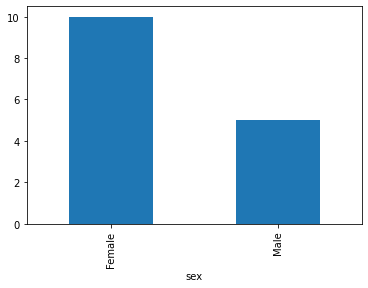

In [24]:
#7
counts = df['sex'].value_counts()
counts.plot(kind='bar')
plt.show()

In [27]:
# 8
female_somker = df[(df['sex']== 'Female')&(df['smoker'] == 'yes')]
female_somker

,total_bill,tip,sex,smoker,day,time,size,Net bill


In [29]:
# 9
weekend_days=['Sat','Sun']
weekend_df = df[df['day'].isin(weekend_days)]
total_bill_weekend = weekend_df['total_bill'].sum()
total_bill_weekend

292.7

In [40]:
sex_count=df.value_counts("sex")
sex_count.values


array([10,  5])

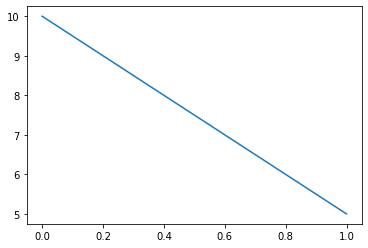

In [47]:
plt.plot(sex_count.values)